<h1>Kurvendiskussion</h1>

$f(x):=10x \cdot e^{-\frac{1}{4}x}$

<h2>Statische Darstellung von Exrempunkte und Wendepunkte</h2>

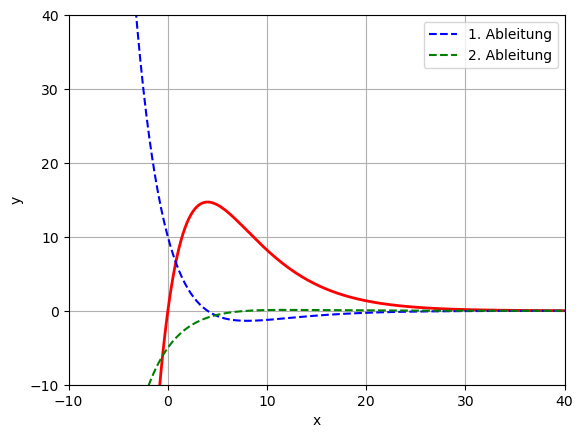

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

h=1e-6 # Schrittweite
x1,x2=-10,40 
y1,y2=-10,40
plt.xlim(x1,x2)
plt.ylim(y1,y2)

def f(x):
	return 10*x*np.e**(-1/4*x)

def df_1(x):
	return derivative(f,x,dx=h)

def df_2(x):
	return derivative(df_1,x,dx=h)

x = np.linspace(x1, x2, 500)
plt.plot(x, f(x), lw=2, color='r')
plt.plot(x, df_1(x), 'b--', label='1. Ableitung')
plt.plot(x, df_2(x), 'g--', label='2. Ableitung')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

<h2>Simulation der Tangentensteigung</h2>

<IPython.core.display.Javascript object>


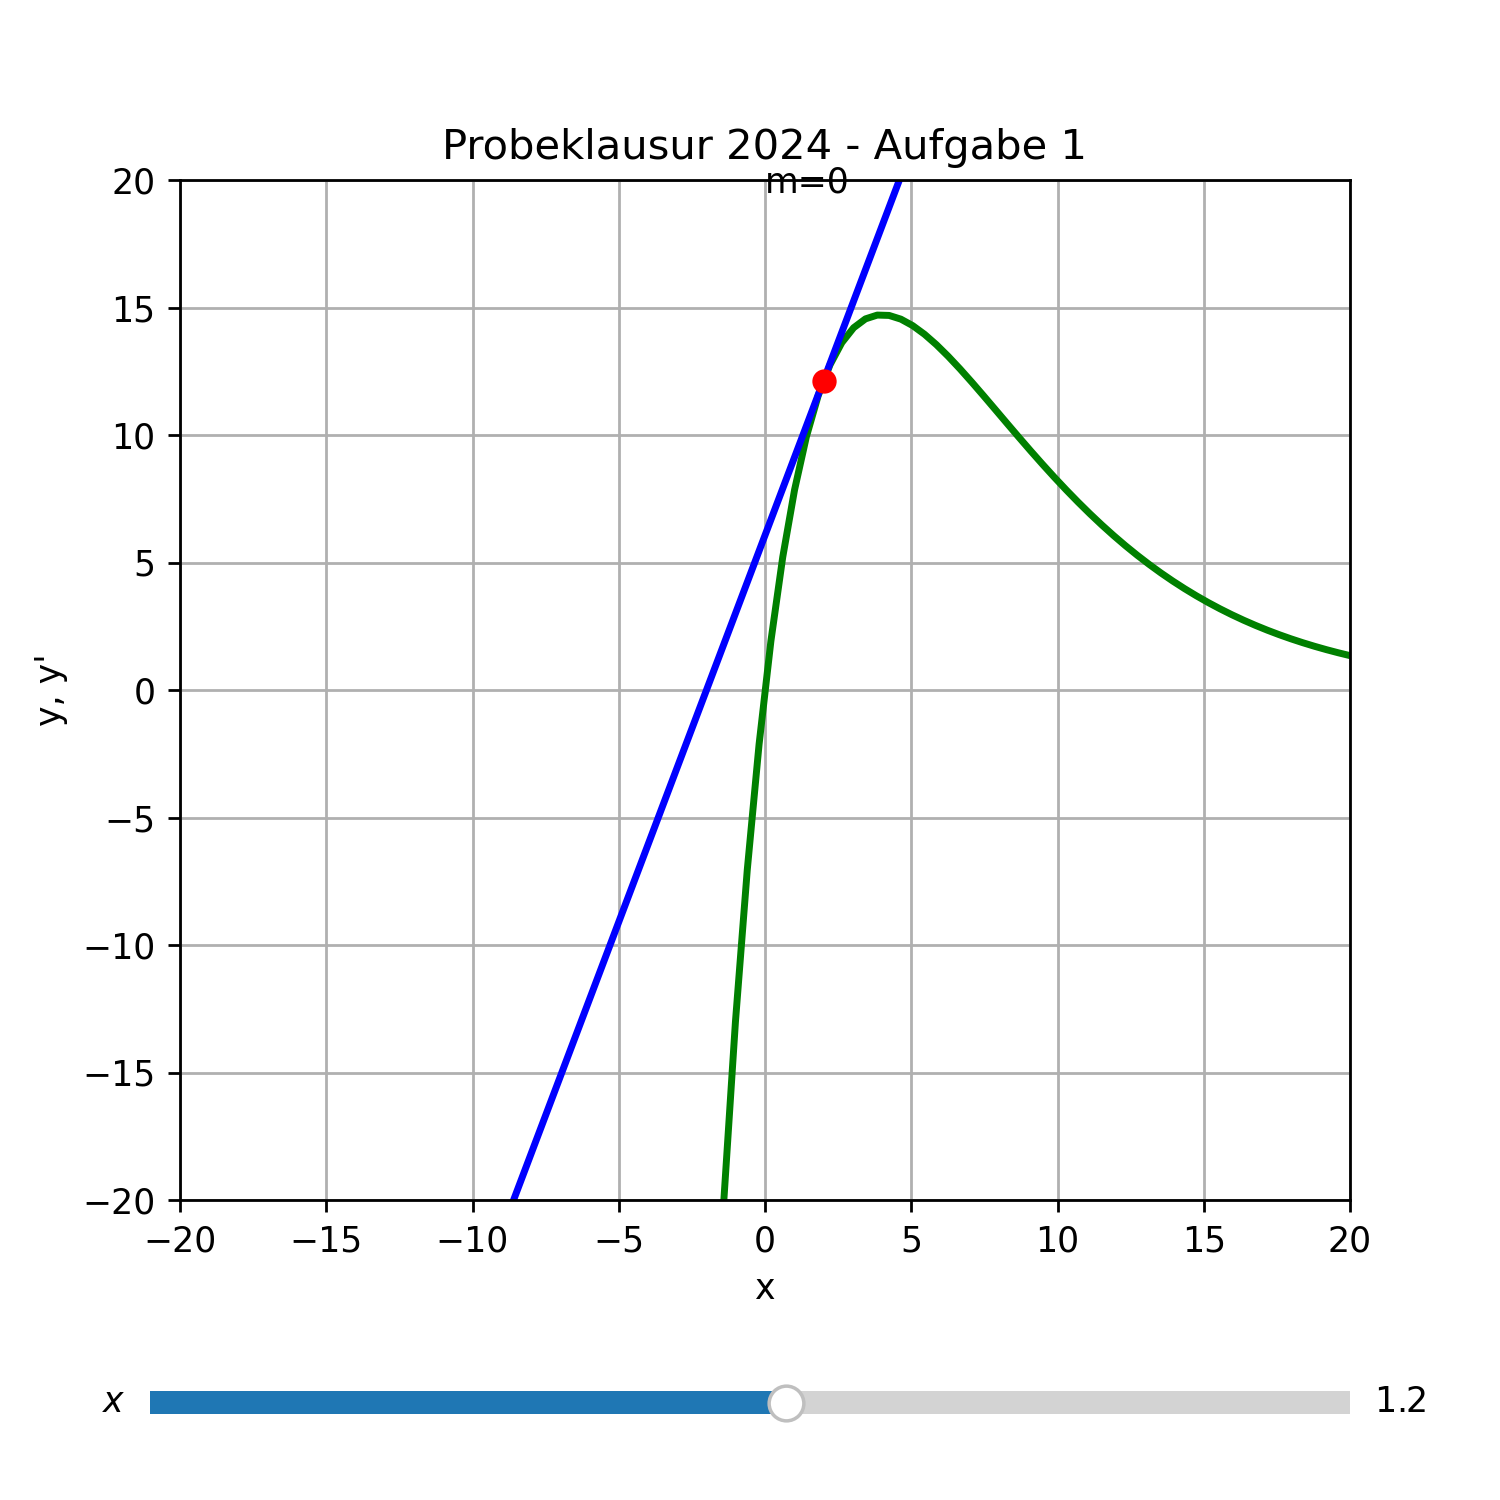

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from scipy.misc import derivative
%matplotlib notebook

fig, ax = plt.subplots(figsize=(6,6))
plt.subplots_adjust(left=0.12,bottom=0.2)
plt.title("Probeklausur 2024 - Aufgabe 1")
plt.xlabel("x")
plt.ylabel("y, y'")
x1,x2=-20,20
y1,y2=-20,20
plt.xlim(x1,x2)
plt.ylim(y1,y2)
txtM=ax.text(0,y2-0.5,'m=0')

#Polynom
def f(x):
	y=10*x*np.e**(-1/4*x)
	return y

#Tangentengleichung
def tangente(x,x0):
	m=derivative(f,x0,dx=1e-3)
	return m*(x-x0)+f(x0)

x = np.linspace(x1, x2, 100)
y1,y2 = plt.plot(x, f(x), x, tangente (x,2))
plt.setp(y1, color='g', linewidth=2.0)
plt.setp(y2, color='b', linewidth=2.0)
y3, = plt.plot(2,f(2), "or")
#x-, y-Position, Laenge, Hoehe
xyA = plt.axes([0.1, 0.05, 0.8, 0.03])
#Slider-Objekte erzeugen
sldA=Slider(xyA,r'$x$',x1,x2,valinit=1.2,valstep=0.1)

def update(val):
	xi = sldA.val
	m = derivative(f,xi,dx=1e-3)
	y1.set_data(x,f(x)) # Funktionsgraph
	y2.set_data(x,tangente(x,xi)) # Tangente
	y3.set_data(xi,f(xi)) # Berührungspunkt der Tangente
	txtM.set_text(f'm = {m:2.1f}')

sldA.on_changed(update)
ax.grid(True)
plt.show()

<h2>Kurvendiskussion mit SymPy</h2>

Funktionsterm
 10*x*exp(-x/4)
Nullstellen
[0]
Extremwerte
Maxima x= 4.000 y= 14.72
Wendepunkte
8.000|

<IPython.core.display.Javascript object>


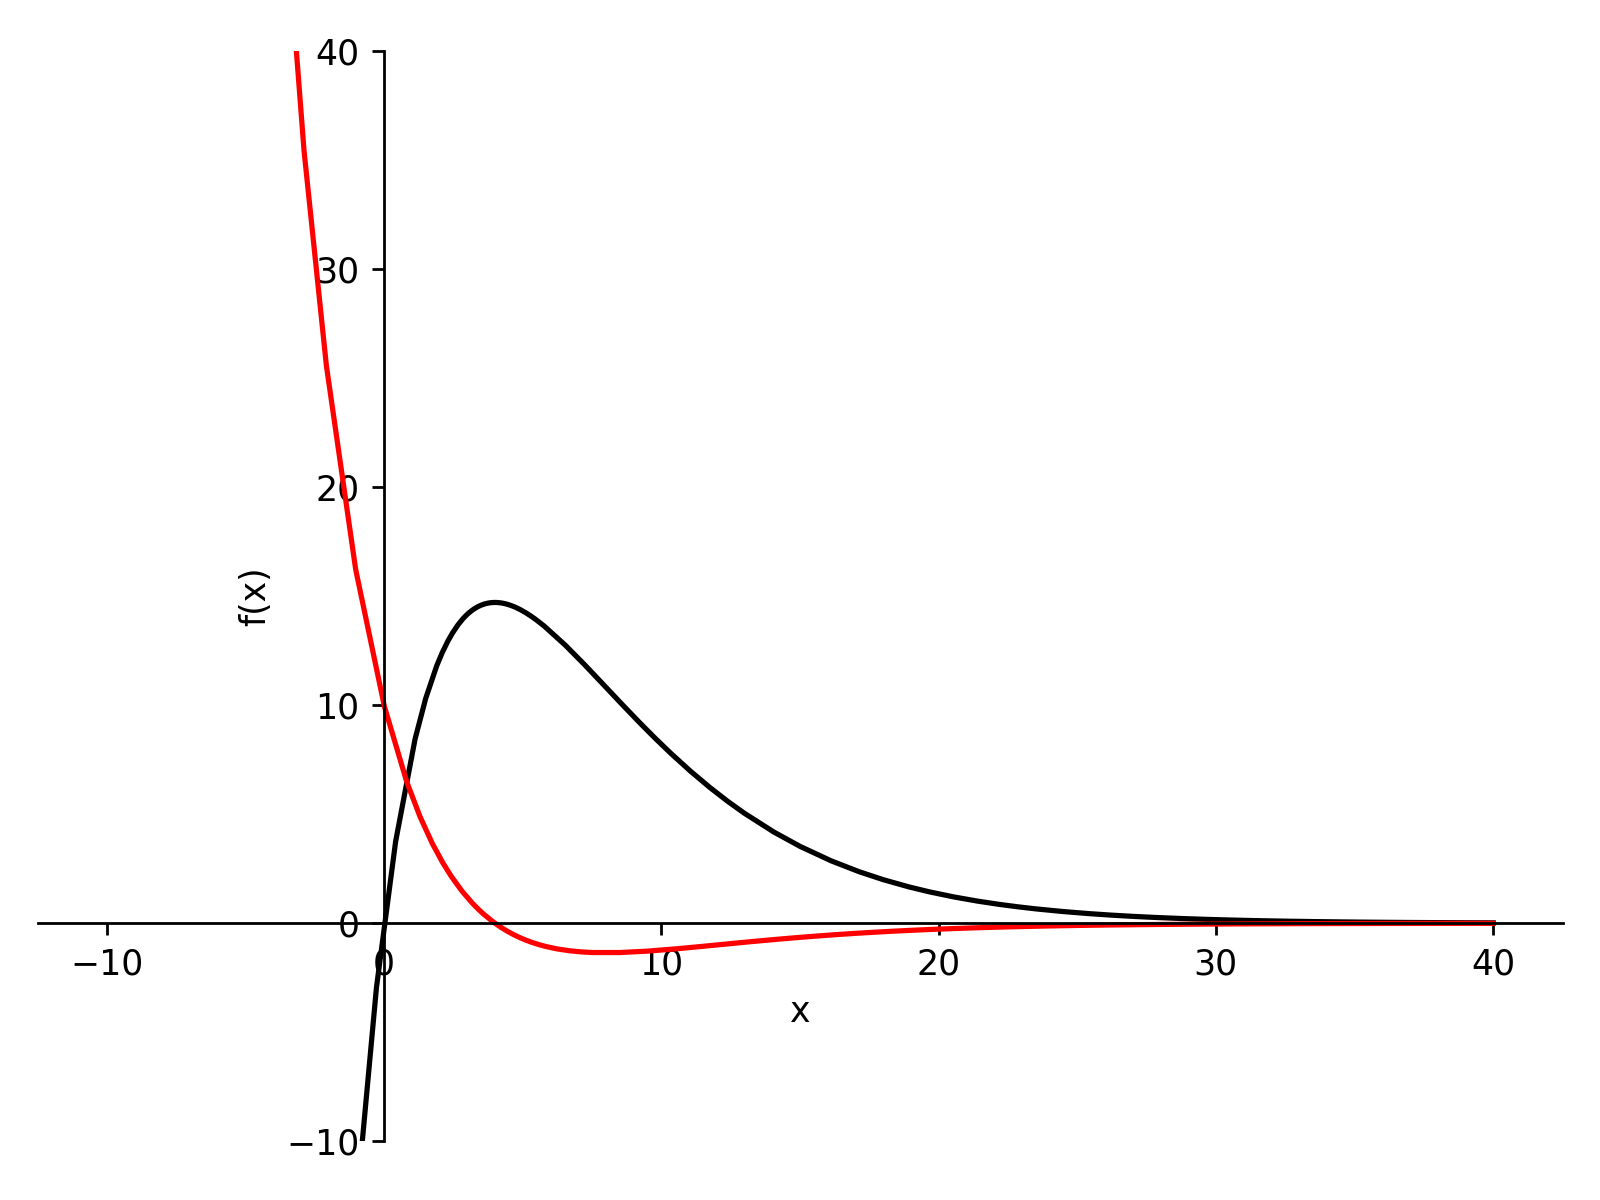

In [10]:
from sympy import *

x=symbols('x')
x1,x2=-10,40
fx=10*x*E**(-x/4)
df1=diff(fx,x)
df2=diff(fx,x,2)
x0=solve(fx,x)
m=solve(df1,x,dict=True)
w=solve(df2,x,dict=True)

#Ausgabe
print("Funktionsterm\n",fx)
print("Nullstellen")
print(x0)
print("Extremwerte")

for i in range(len(m)):
	mx=m[i][x].evalf(4)
	if df2.subs(x,mx)<0:
		print("Maxima x=",mx,"y=",fx.subs(x,mx))
	elif df2.subs(x,mx)>0:
		print("Minima x=",mx,"y=",fx.subs(x,mx))
	
print("Wendepunkte")

for i in range(len(w)):
	wx=w[i][x].evalf(4)
	print(wx,end="|")

#Darstellung
p=plot(fx,df1,(x,x1,x2),show=False,visible=False,ylim=(-10,40))
p[0].line_color='black'
p[1].line_color='red'
p.show()